
<p align ="left"><font size="5">Program to Implement Various Image Enhancement Techniques </font></p>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from PIL import Image

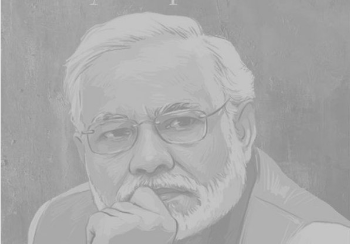

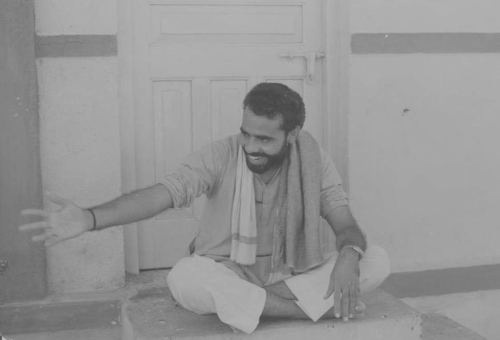

In [ ]:
image1  =cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Lab 3_1.jpeg",0)
aspect =(round(image1.shape[1]/image1.shape[0],2))
width =350
height = int((width/aspect))
resize_points = (width, height)
image1 = cv2.resize(image1, resize_points)
cv2_imshow(image1)
print()
image2  =cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Lab 3_2.jpeg",0)
aspect =(round(image2.shape[1]/image2.shape[0],2))
width =500
height = int((width/aspect))
resize_points = (width, height)
image2 = cv2.resize(image2, resize_points)
cv2_imshow(image2)

In [ ]:
def histogram_equalization(image1, image2):
  hist_original = cv2.calcHist([image1],[0],None,[256],[0,256])
  hist_equalized_img = cv2.equalizeHist(image1)
  histogram_equal = cv2.calcHist([hist_equalized_img], [0], None, [256], [0,256])
  plt.figure(figsize =(10,5))
  plt.subplot(1,2,1)
  plt.plot(hist_original)
  plt.title("Histogram of Original Image")

  plt.subplot(1,2,2)
  plt.plot(histogram_equal)
  plt.title("Equalized Histogram")
  plt.tight_layout()
  plt.show()
  print()
  print("Original Image\t\t\t\t\t Histogram Equalized Image")
  cv2_imshow(cv2.hconcat([image1, hist_equalized_img]))

  # image_array = np.asarray(image2)
  # histogram_array = np.bincount(image_array.flatten(), minlength=256)
  # num_pixels = np.sum(histogram_array)
  # histogram_array = histogram_array/num_pixels
  # chistogram_array = np.cumsum(histogram_array)
  # transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
  # img_list = list(image_array.flatten())
  # eq_img_list = [transform_map[p] for p in img_list]
  # eq_img_array = np.reshape(np.asarray(eq_img_list), image_array.shape)
  # eq_img = Image.fromarray(eq_img_array, mode="L")
  # eq_img.save("Modified_Img.jpg")
  # modified_img = Image.open("/content/Modified_Img.jpg")
  # modified_img.show()




  hist_original = cv2.calcHist([image2],[0],None,[256],[0,256])
  hist_equalized_img = cv2.equalizeHist(image2)
  histogram_equal = cv2.calcHist([hist_equalized_img], [0], None, [256], [0,256])
  plt.figure(figsize =(10,5))
  plt.subplot(1,2,1)
  plt.plot(hist_original)
  plt.title("Histogram of Original Image")

  plt.subplot(1,2,2)
  plt.plot(histogram_equal)
  plt.title("Equalized Histogram")
  plt.tight_layout()
  plt.show()
  print()
  print("Original Image\t\t\t\t\t\t\t\t Histogram Equalized Image")
  cv2_imshow(cv2.hconcat([image2, hist_equalized_img]))




def image_sharpening(image2):
  kernel_sharpening = np.array([[-1,-1,-1],
                                [-1,9,-1],
                                [-1,-1,-1]])
  sharpened = cv2.filter2D(image2, -1, kernel_sharpening)
  border_image2 =cv2.copyMakeBorder(src=image2, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_shap =cv2.copyMakeBorder(src=sharpened, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print("Original Image\t\t\t\t\t\t\t\tSharpened Image")
  cv2_imshow(cv2.hconcat([border_image2, border_shap]))


def image_smoothing(image3):
  plt.figure(figsize=(10,10))

  plt.subplot(2,2, 1)
  plt.title("Original")
  plt.imshow(image3)
  kernel_3x3 = np.ones((3, 3), np.float32) / 9
  blurred = cv2.filter2D(image3, -1, kernel_3x3)

  plt.subplot(2,2, 2)
  plt.title("3x3 Kernel Blurring")
  plt.imshow(blurred)


  averageBlur = cv2.blur(image3, (5,5))
  plt.subplot(2,2,3)
  plt.title("Average Blur")
  plt.imshow(averageBlur)


  gaussian = cv2.GaussianBlur(image3, (7,7), 0)
  plt.subplot(2,2,4)
  plt.title("Gaussian Blur")
  plt.imshow(gaussian)
  plt.show()

def RGB_img_denoising(image3):

  bordered_image3 =cv2.copyMakeBorder(src=image3, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  noise_image =random_noise(image3, mode ="gaussian")
  noise_image =np.array(255*noise_image, dtype="uint8")
  border_noisy_image =cv2.copyMakeBorder(src=noise_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  noiseless_image_colored = cv2.fastNlMeansDenoisingColored(noise_image,None,8,7,7,21)
  border_noiseless_image =cv2.copyMakeBorder(src=noiseless_image_colored, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print("Original Image\t\t\t\t\t\t\tGaussian Noisy Image\t\t\t\t\tDenoised Image")
  cv2_imshow(cv2.hconcat([bordered_image3, border_noisy_image, border_noiseless_image]))


def GS_img_denoising(image4):


  bordered_image4 =cv2.copyMakeBorder(src=image4, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)

  noise_image =random_noise(image4, mode ="gaussian")
  noise_image =np.array(255*noise_image, dtype="uint8")
  border_noisy_image =cv2.copyMakeBorder(src=noise_image, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  noiseless_image_bw = cv2.fastNlMeansDenoising(noise_image, None, 20, 7, 21)
  border_noiseless_image =cv2.copyMakeBorder(src=noiseless_image_bw, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print("Original Image\t\t\t\t\t\t\t\t Gaussian Noisy Image\t\t\t\t\tDenoised Image")
  cv2_imshow(cv2.hconcat([bordered_image4, border_noisy_image, border_noiseless_image]))



def dilation(image5):
  kernel = np.ones((3,3), np.uint8)
  erosion = cv2.dilate(image5, kernel, iterations = 1)
  border_img =cv2.copyMakeBorder(src=image5, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  border_erosion =cv2.copyMakeBorder(src=erosion, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT)
  print("Original Image\t\t\t\t\t\tDilated Image")
  cv2_imshow(cv2.hconcat([border_img,border_erosion]))

***IMAGE ENHANCEMENT TECHNIQUES***


Histogram Equalization


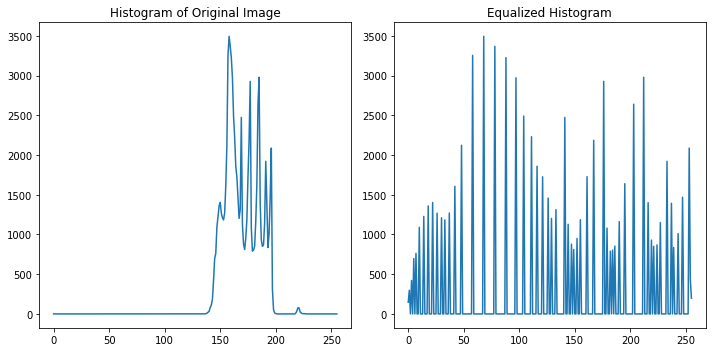


Original Image					 Histogram Equalized Image


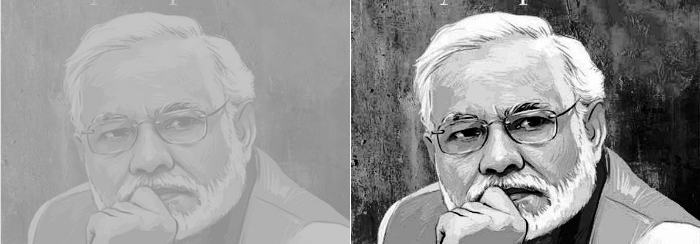

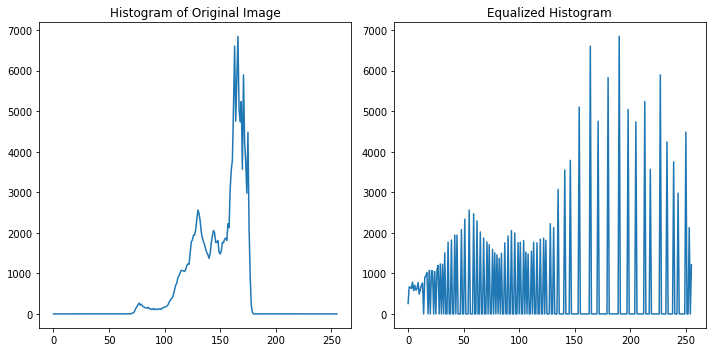


Original Image								 Histogram Equalized Image


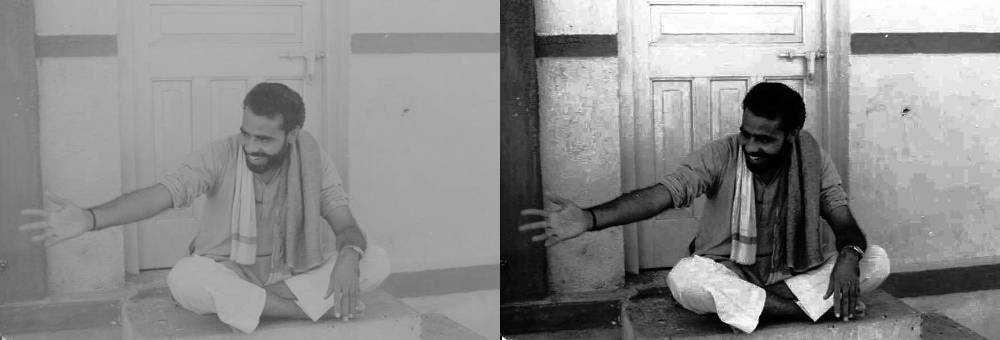


Image Sharpening
Original Image								Sharpened Image


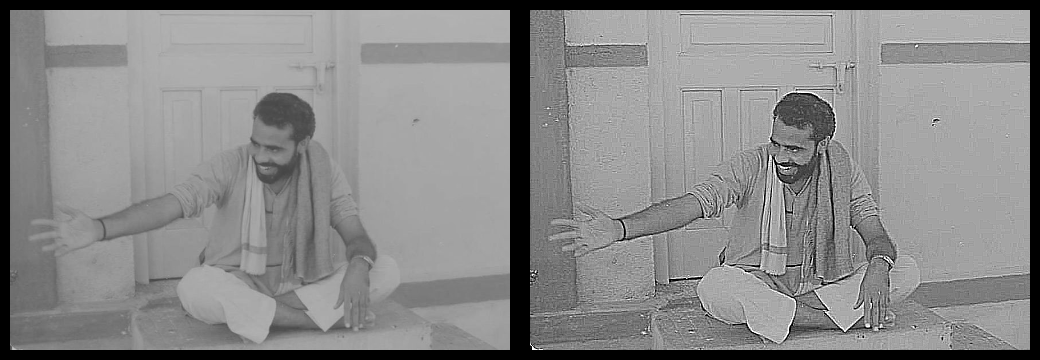



Image Smoothing


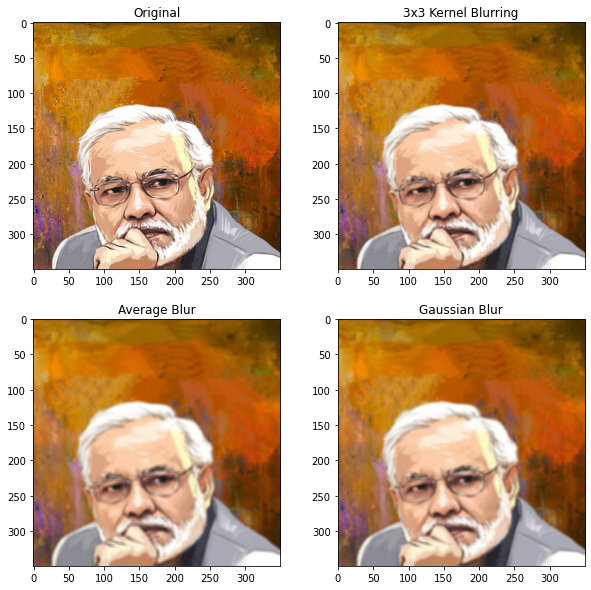



Image Denoising
Original Image							Gaussian Noisy Image					Denoised Image


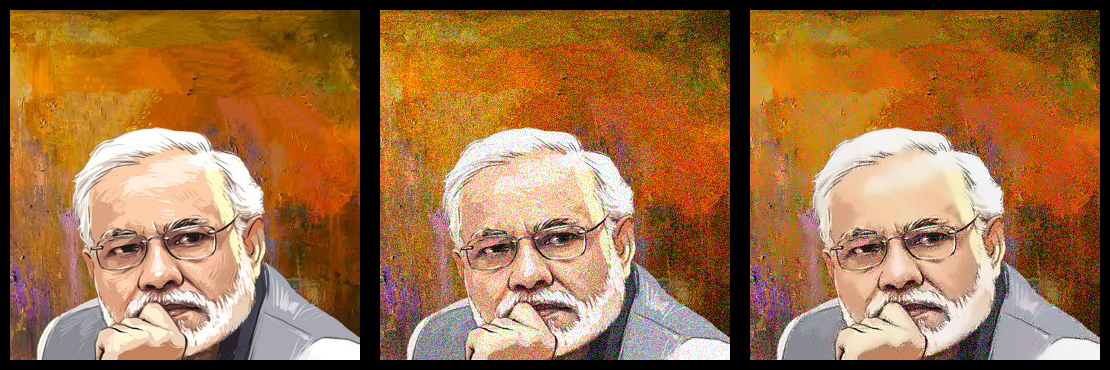


Original Image								 Gaussian Noisy Image					Denoised Image


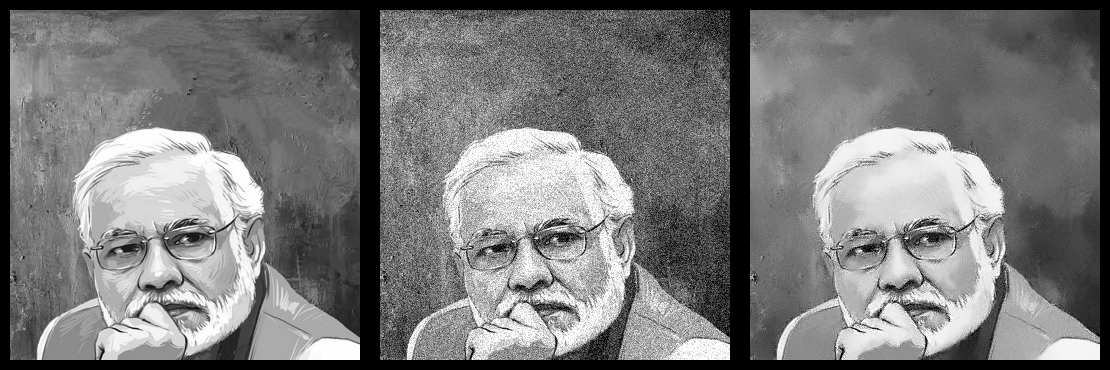



Original Image						Dilated Image


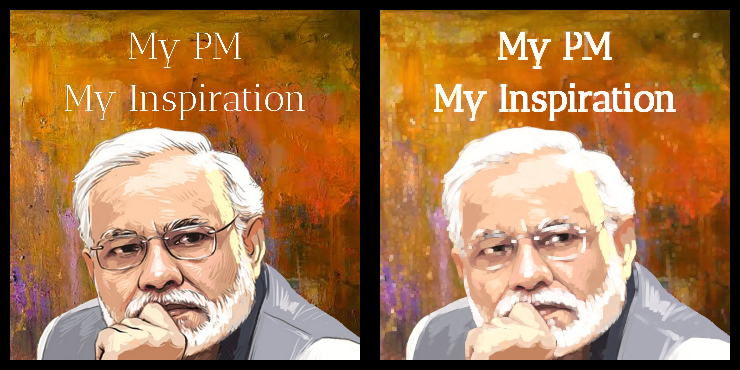

In [ ]:
def main():
  image2  =cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/Lab 3_2.jpeg",0)
  aspect =(round(image2.shape[1]/image2.shape[0],2))
  width =500
  height = int((width/aspect))
  resize_points = (width, height)
  image2 = cv2.resize(image2, resize_points)
  print("***IMAGE ENHANCEMENT TECHNIQUES***")
  print("\n\nHistogram Equalization")
  histogram_equalization(image1, image2)
  print()
  print("Image Sharpening")
  image_sharpening(image2)
  print("\n\nImage Smoothing")
  rgb_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 3_3.png',1)
  rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
  image_smoothing(rgb_image)
  print("\n\nImage Denoising")
  rgb_image2= cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 3_3.png',cv2.IMREAD_COLOR)
  RGB_img_denoising(rgb_image2)
  print()
  gray_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/lab 3_3.png", 0)
  GS_img_denoising(gray_image)
  print()
  print()
  image_word = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV_IMAGES/IMG_20200409_110925.jpg")
  aspect =(round(image_word.shape[1]/image_word.shape[0],2))
  width =350
  height = int((width/aspect))
  resize_points = (width, height)
  image_word = cv2.resize(image_word, resize_points)
  dilation(image_word)
main()
